# A first clustering algorithm: K-means

#### Outline

- Algorithm
- Implementation
- scikit-learn implementation
- Choose K

#### Toy data generation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

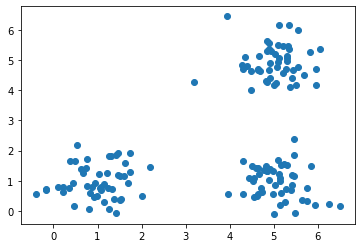

In [2]:
means = [np.array([1, 1]), np.array([5, 5]), np.array([5, 1])]
covariance = np.array([[0.25, 0], [0, 0.25]])
n_points = 50

data = [np.random.multivariate_normal(mean=means[i], cov=covariance, size=n_points) for i in range(3)]
all_data = np.r_[data[0], data[1], data[2]]

plt.scatter(all_data[:, 0], all_data[:,1])
plt.show()

## K-means algorithm

### Objective

Find _cluster centers_ or _centroids_ representing the different clusters

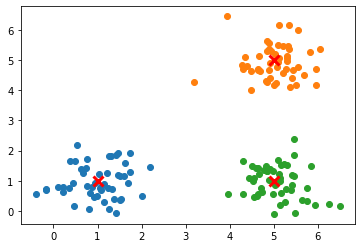

In [3]:
plt.scatter(data[0][:, 0], data[0][:,1])
plt.scatter(means[0][0], means[0][1], c="r", marker="x", s=100, linewidths=3)
plt.scatter(data[1][:, 0], data[1][:,1])
plt.scatter(means[1][0], means[1][1], c="r", marker="x", s=100, linewidths=3)
plt.scatter(data[2][:, 0], data[2][:,1])
plt.scatter(means[2][0], means[2][1], c="r", marker="x", s=100, linewidths=3)
plt.show()

#### Formulation for M data points and K desired clusters. 

We call $c_k$ the centroid of cluster $k$, $a_{ik}$ the membership variable and $d(. ,.)$ the distance metric used.

$$\text{Minimize}_{A, c} \sum_{i=1}^{M} \sum_{k=1}^K a_{ik} \times d(x_i, c_k)$$
$$\text{subject to} \sum_{k=1}^K a_{ik} = 1, \forall i \in \{1, ..., M\}$$
$$a_{ik} \in \{0, 1\}, \forall i \forall k$$

#### Solving with the EM-algorithm

- Fix K, the desired number of clusters
- Initialize the K centroids as random points from the dataset
- Repeat:
    - Allocation update: Choose the new allocation as the closest centroid obtained at previous step
    - Centroid update: Compute the centroid of the new class (mean), defined by the new allocation obtained
at stage 2
- Stop when the centroids are not moving anymore


### Demonstration K-means

K=3

#### Initialization

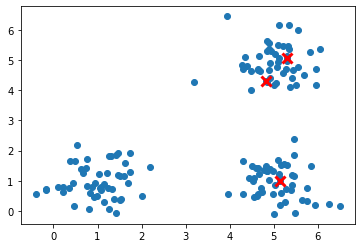

In [4]:
centroids_idx = np.random.randint(0, 3*n_points, 3)
centroids = all_data[centroids_idx]

plt.scatter(all_data[:, 0], all_data[:,1])
plt.scatter(centroids[:,0], centroids[:,1], c="r", marker="x", s=100, linewidths=3)
plt.show()

#### Allocation update

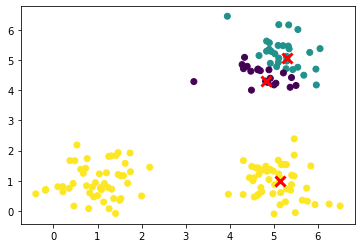

In [5]:
labels = np.array([-1] * 3*n_points)
for i_d in range(len(all_data)):
    dist = 1000
    for i in range(3):
        new_dist = np.linalg.norm(all_data[i_d]-centroids[i])
        if new_dist < dist:
            dist = new_dist
            labels[i_d] = i
            
plt.scatter(all_data[:, 0], all_data[:,1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c="r", marker="x", s=100, linewidths=3)
plt.show()

#### Centroids update

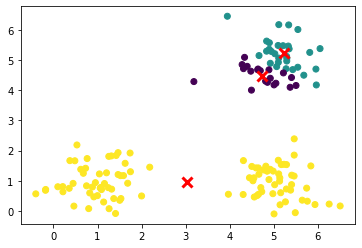

In [6]:
for i in range(3):
    centroids[i] = np.mean(all_data[labels == i], axis=0)

plt.scatter(all_data[:, 0], all_data[:,1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c="r", marker="x", s=100, linewidths=3)
plt.show()

#### More steps

Allocation update


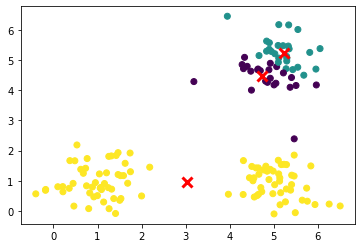

In [7]:
labels = np.array([-1] * 3*n_points)
for i_d in range(len(all_data)):
    dist = 1000
    for i in range(3):
        new_dist = np.linalg.norm(all_data[i_d]-centroids[i])
        if new_dist < dist:
            dist = new_dist
            labels[i_d] = i

print("Allocation update")            
plt.scatter(all_data[:, 0], all_data[:,1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c="r", marker="x", s=100, linewidths=3)
plt.show()

centroids update


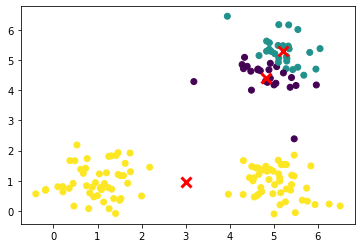

In [8]:
for i in range(3):
    centroids[i] = np.mean(all_data[labels == i], axis=0)

    
print("centroids update")    
plt.scatter(all_data[:, 0], all_data[:,1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c="r", marker="x", s=100, linewidths=3)
plt.show()

Allocation update


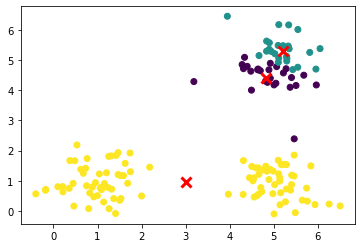

In [9]:
labels = np.array([-1] * 3*n_points)
for i_d in range(len(all_data)):
    dist = 1000
    for i in range(3):
        new_dist = np.linalg.norm(all_data[i_d]-centroids[i])
        if new_dist < dist:
            dist = new_dist
            labels[i_d] = i

print("Allocation update")            
plt.scatter(all_data[:, 0], all_data[:,1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c="r", marker="x", s=100, linewidths=3)
plt.show()

Centroids update


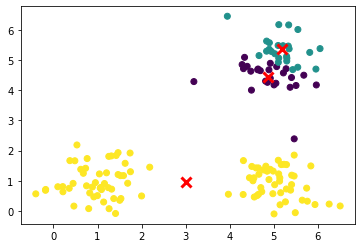

In [10]:
for i in range(3):
    centroids[i] = np.mean(all_data[labels == i], axis=0)

print("Centroids update")
plt.scatter(all_data[:, 0], all_data[:,1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c="r", marker="x", s=100, linewidths=3)
plt.show()